In [2]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'month', 100, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['month_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['month'] = data_prices[['open']].apply(
    lambda x: x.name.month, axis=1)
data_prices['year'] = data_prices[['open']].apply(
    lambda x: x.name.year, axis=1)

total = data_prices.iloc[:, 0].count()
last_date = data_prices.iloc[0].name.date()
first_date = data_prices.iloc[-1].name.date()

print(f"Thông tin: {total} hàng từ ngày {first_date} đến {last_date}")

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices, "ASC")

print(data_prices)



Thông tin: 47 hàng từ ngày 2018-01-01 đến 2021-11-01
year        2018       2019       2020       2021
month                                            
1     -26.152264   4.979947  64.688787   4.137820
2      22.465571  45.116131 -14.657454  27.711216
3     -42.509660  32.573433 -32.678725  19.017366
4      27.850065  22.903919  18.582032  37.846357
5     -20.295228  54.218813  -1.554069 -30.674190
6     -31.221987   7.501090  -9.714912 -23.270039
7      -3.257930 -19.850674  41.229349   0.041577
8     -21.378786 -34.960008   4.799587  18.808452
9      -1.337847 -12.828896 -24.122087 -10.664336
10    -18.401700   4.070702  20.449633  25.261097
11    -35.502603 -19.008406  57.389118   2.136529
12     -7.114011 -12.518534  41.695186        NaN


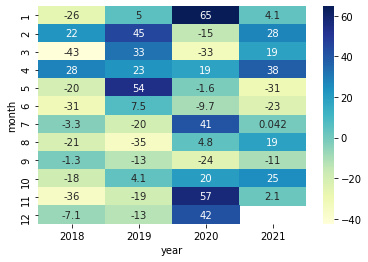

In [6]:
import seaborn as sns

month_price_retrun = data_prices.pivot(index='month', columns='year', values='month_return')

ax = sns.heatmap(month_price_retrun, annot=True, cmap="YlGnBu")

